# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

Some funtion defined for later use

In [2]:
def plot_confusion_matrix(array):
    sns.set(font_scale=1.5,
            font="calibri")
    plt.figure(figsize=(10, 7))
    df = pd.DataFrame(array, range(array.shape[0]), range(array.shape[1]))
    sns.heatmap(df, 
                annot=True,
                annot_kws={"size": 30}, 
                fmt='')
    plt.show()

In [3]:
def plot_kde(df, palette):
    fig, ax = plt.subplots(nrows=2, ncols=5)
    fig.set_figheight(10)
    fig.set_figwidth(25)
    for i, j in enumerate(ax.reshape(-1)):
        sns.kdeplot(df.iloc[:, i], ax=j, color=palette)

In [4]:
def scatter_plot_linear(df, palette):
    sns.set(font_scale=1.75)
    fig, ax = plt.subplots(ncols=3)
    fig.set_figheight(10)
    fig.set_figwidth(25)
    cols = df[:-1].columns
    for i, j in zip(cols[1:], ax.reshape(-1)[1:]):
        sns.scatterplot(x=i, y=cols[0], ax=j, data=df, hue='diagnosis', palette=palette)
    sns.scatterplot(x=cols[1], y=cols[2], ax=ax[0], data=df, hue='diagnosis', palette=palette)

In [5]:
def plot_box(df, color):
    sns.set(font_scale=1.5)
    fig, ax = plt.subplots(nrows=2, ncols=5)
    fig.set_figheight(10)
    fig.set_figwidth(25)
    for i, j in zip(df.columns[:], ax.reshape(-1)):
        sns.boxplot(x=i, data=df, ax=j, color=color)

# Exploratory Data Analysis

Importing the text file with feature names written in it

In [6]:
with open('feature_names.txt', 'r') as features:
    feature_names = features.read()

In [7]:
print(feature_names)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


Importing the breast cancer dataset

Source: [Breast Cancer Wisconsin (Diagnostic) Data Set](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [8]:
df = pd.read_csv('wdbc.data', names=feature_names.split(','))

In [9]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

Replacing the object categorical values with numerical values

In [10]:
df['diagnosis'].replace({'M':1, 'B':0}, inplace=True)
df.drop('id', axis=1, inplace=True)

Checking the datatypes and total values of data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

Checking Descriptive Stats of the data

In [12]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

Splitting the data to dependent and independent variables.
>X contain independent variables and y contains dependent variables

In [13]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

Below count plot shows the total volume of each class (Malignant and Benign) in the data

Text(0, 0.5, 'Count')

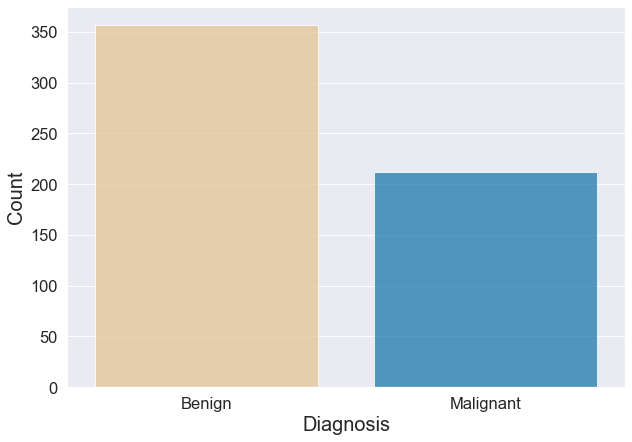

In [14]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 7))
sns.countplot(y, alpha=0.8, palette=['#f0cb8f', '#1488c5'])
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.xlabel("Diagnosis", fontsize=20)
plt.ylabel("Count", fontsize=20)

Splitting the data into training and testing for further analysis

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

###### All features are split into 3 parts and analyzed separately

### Heatmaps to check correlation

> Parimeter_mean, radius_mean and area_mean are highly correlated

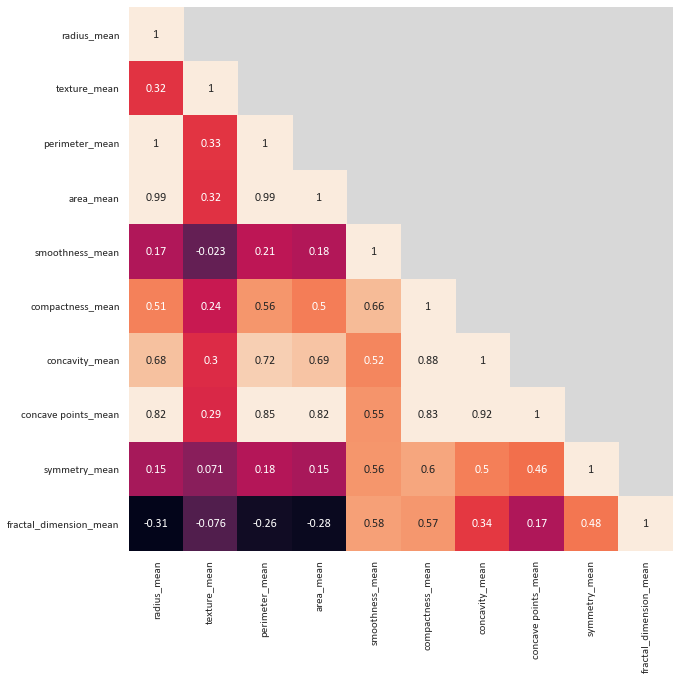

In [16]:
sns.set(style='darkgrid', font_scale=1, font="calibri", 
            rc={'axes.facecolor':'#d8d8d8'})

corrMatt = X.iloc[:, :10].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(18)
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True, cbar=False)

> area_se, parimeter_se and radius_se are highly correlated

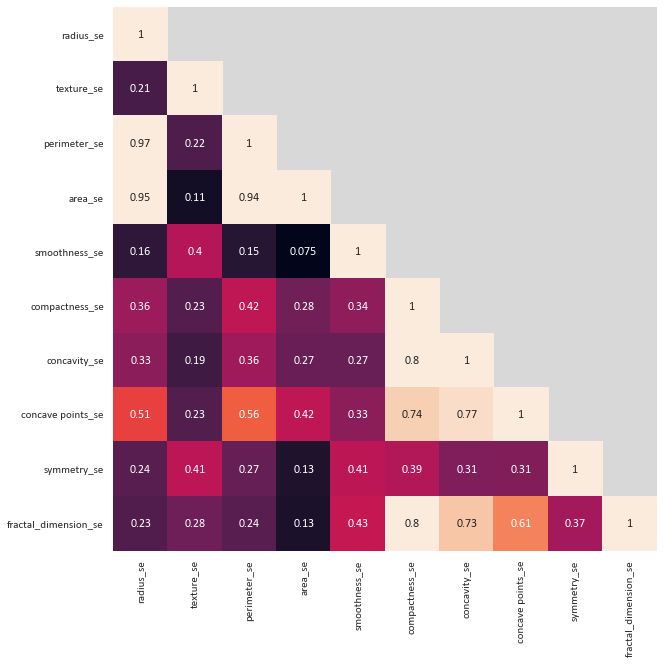

In [17]:
sns.set(style='darkgrid', font_scale=1, font="calibri", 
            rc={'axes.facecolor':'#d8d8d8'})

corrMatt = X.iloc[:, 10:20].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(18)
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True, cbar=False)

> parameter_worst, radius_worst and area_worst are highly correlated

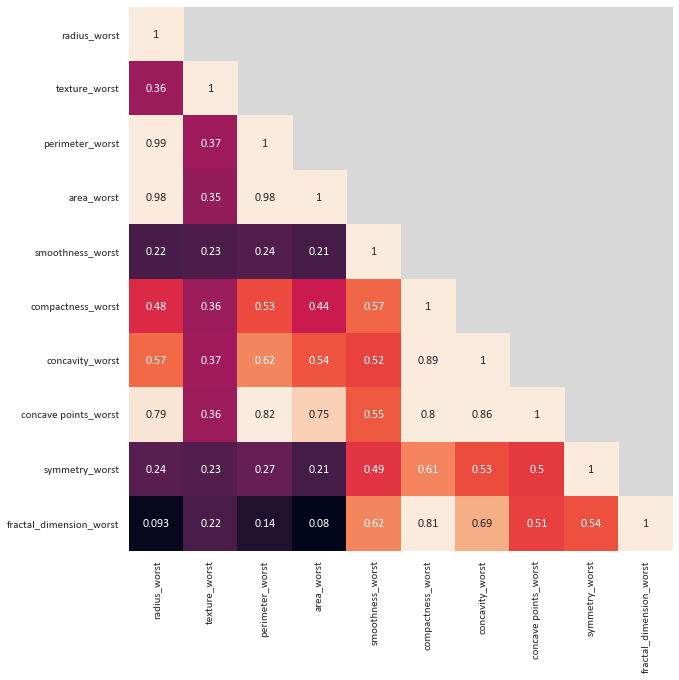

In [18]:
sns.set(style='darkgrid', font_scale=1, font="calibri", 
            rc={'axes.facecolor':'#d8d8d8'})

corrMatt = X.iloc[:, 20:].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(18)
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True, cbar=False)

Scatter plots to check highly correlated features

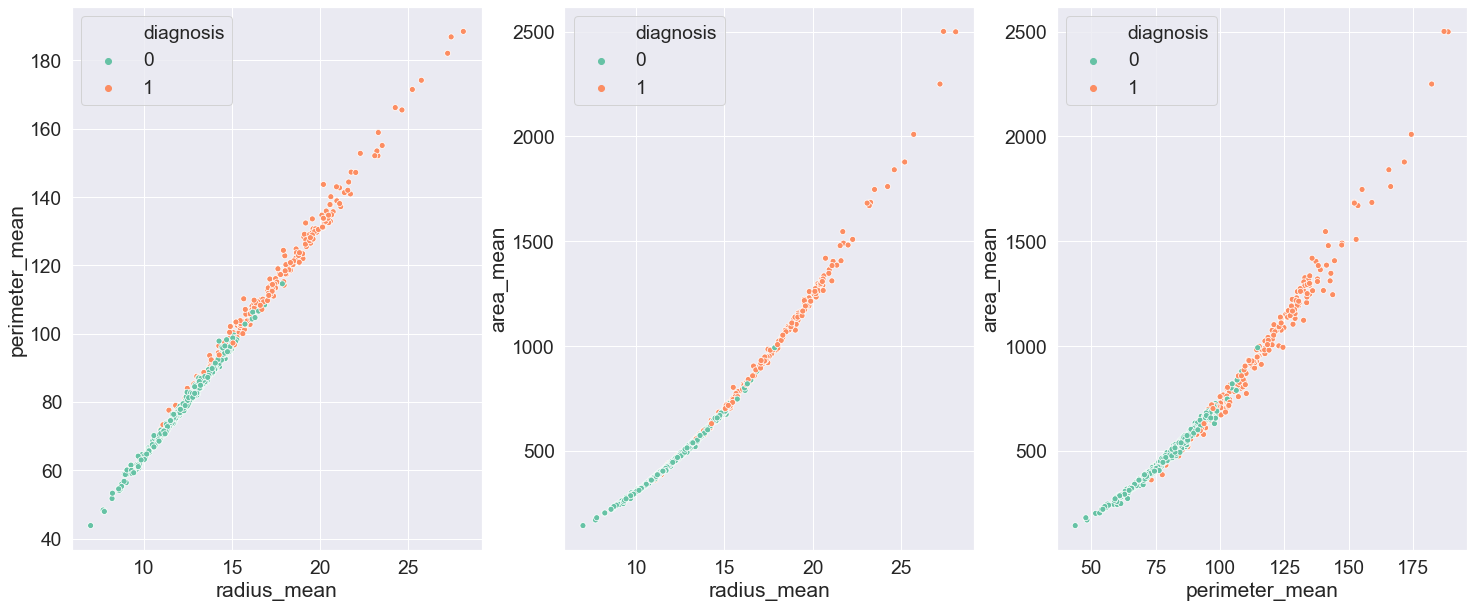

In [19]:
scatter_plot_linear(df[['area_mean', 'radius_mean', 'perimeter_mean', 'diagnosis']],
                   palette='Set2')

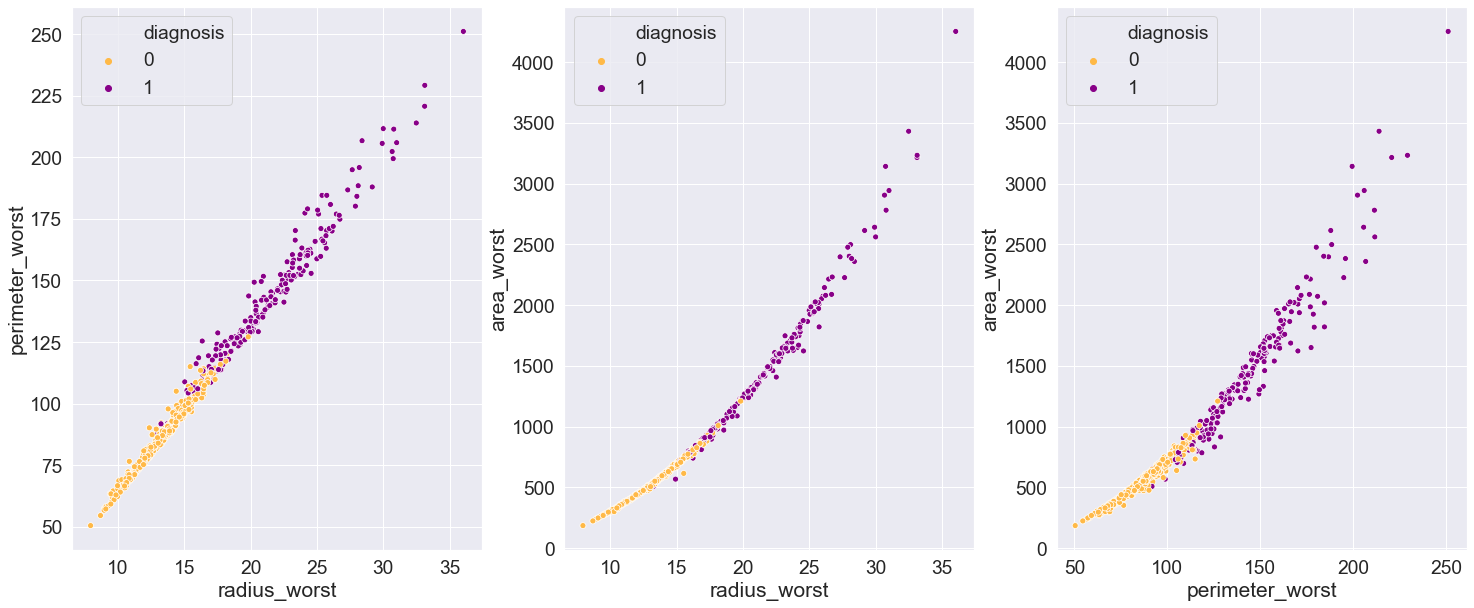

In [20]:
scatter_plot_linear(df[['area_worst', 'radius_worst', 'perimeter_worst', 'diagnosis']],
                   palette=['#ffb947', '#880088'])

###### As perimeter and area are derived from radius, so they are highly correlated with each other. We will drop the two variables later.

### Pairplots
- This will give the scatter plot between selected variables

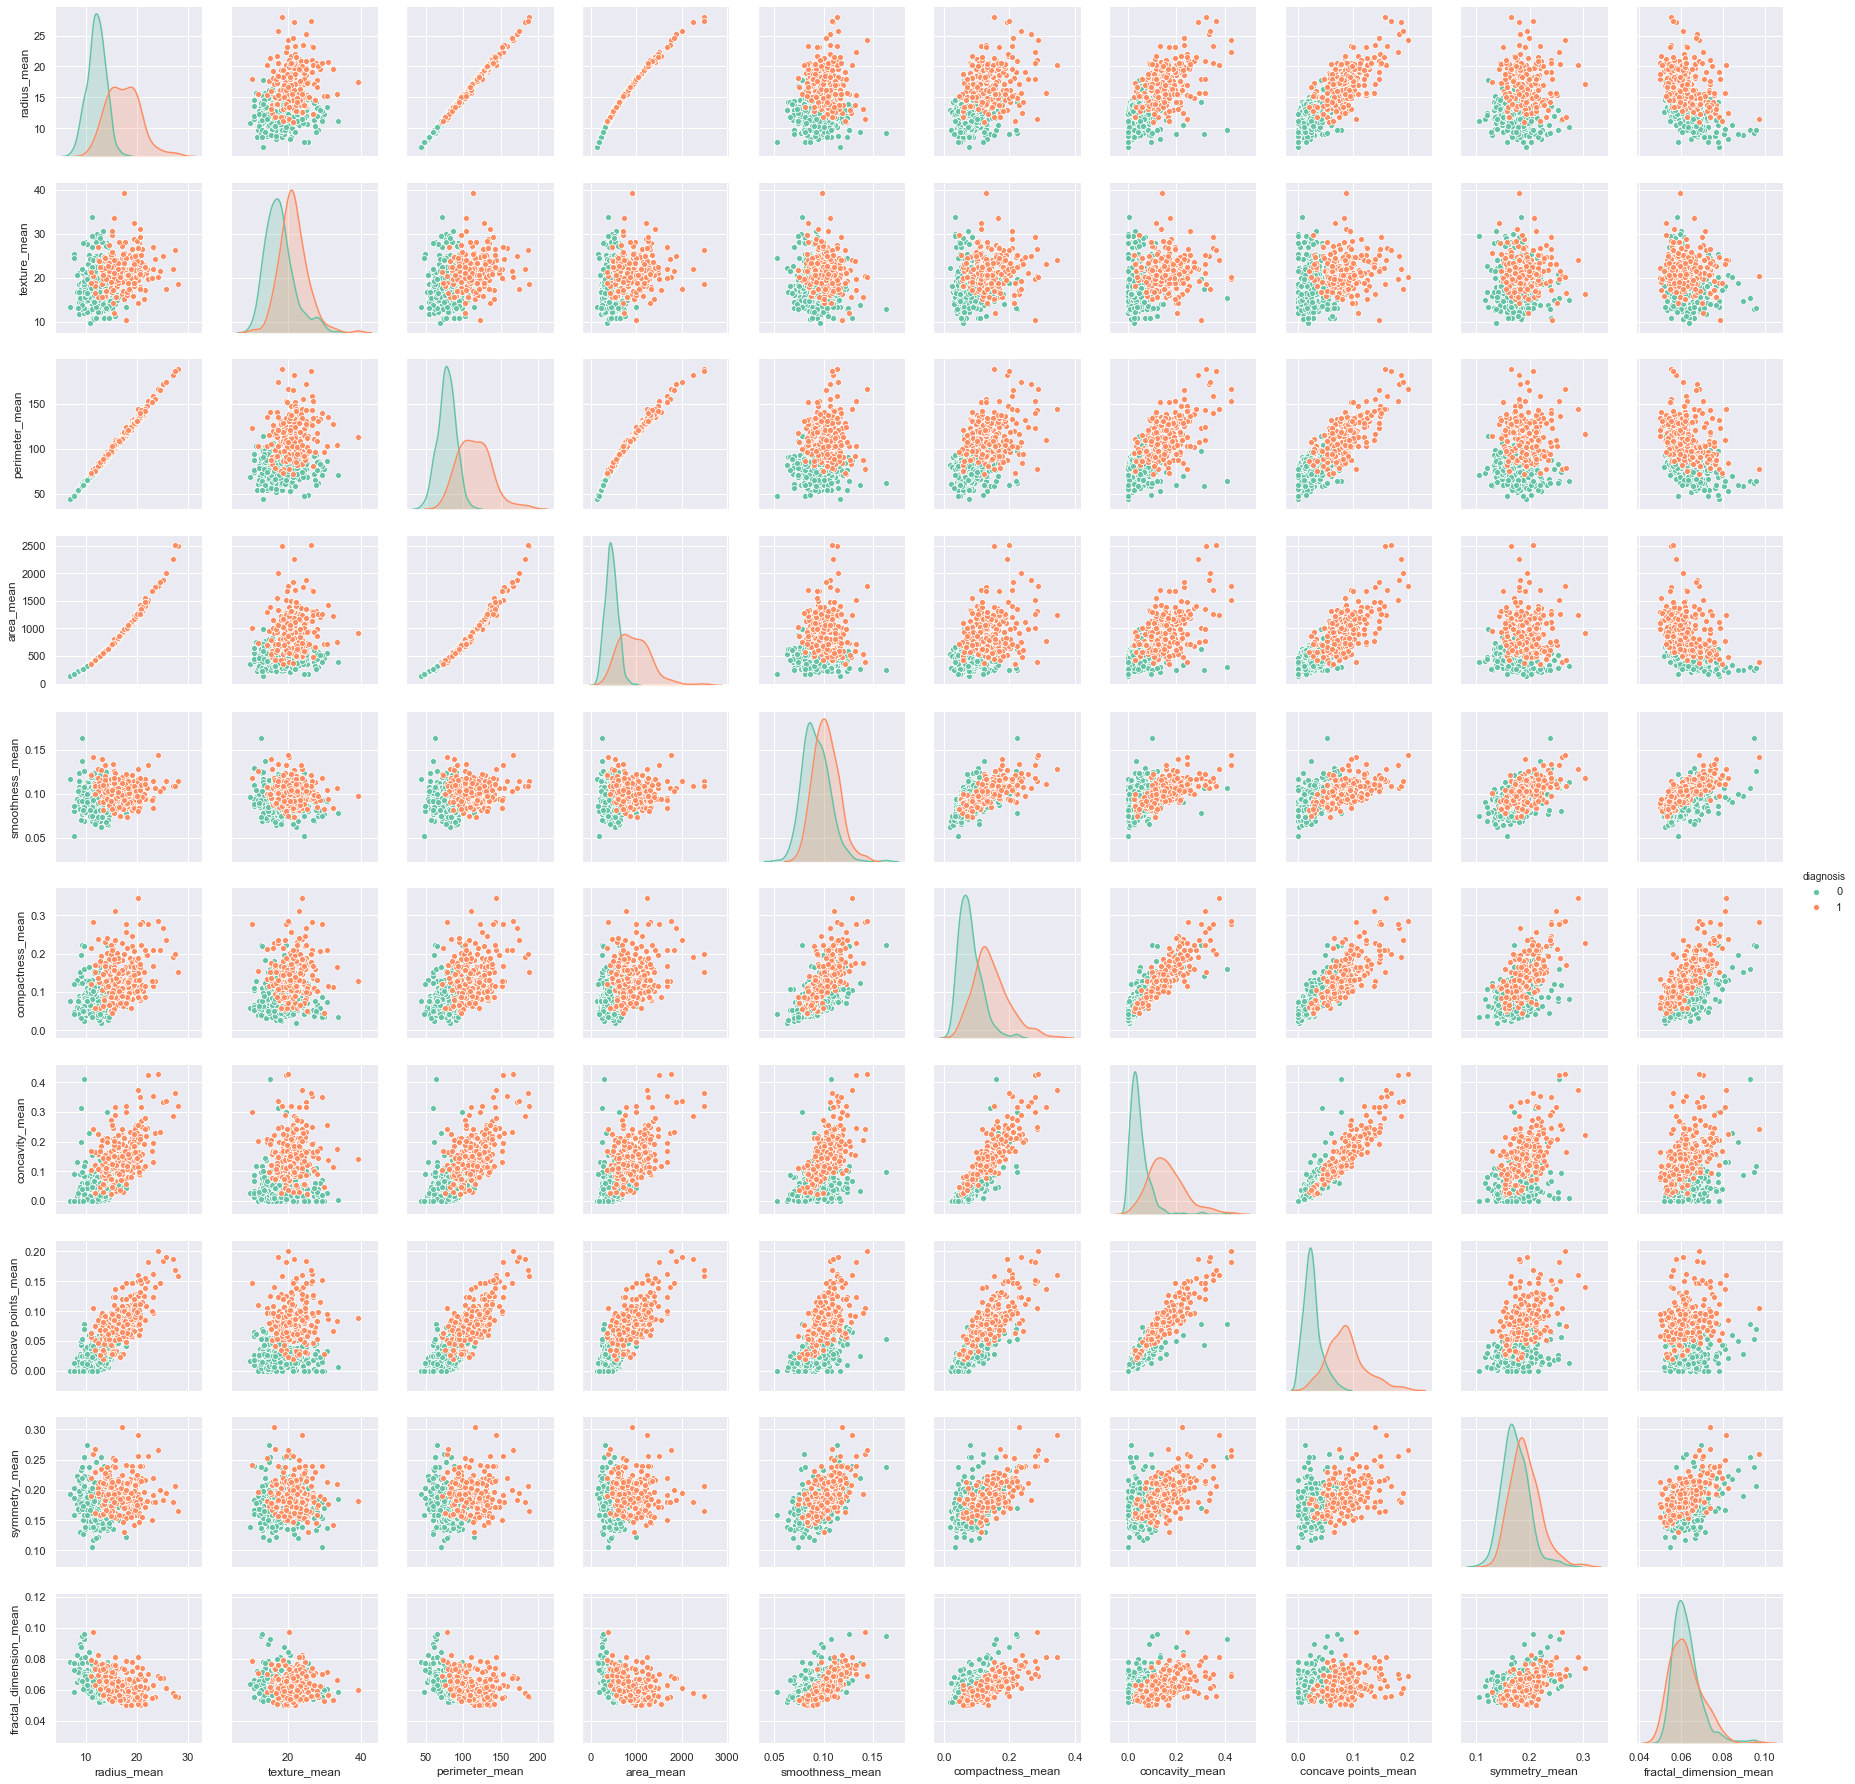

In [21]:
sns.set(font_scale=1)
sns.pairplot(data=df, hue='diagnosis', vars=df.iloc[:, 1:11].columns, palette='Set2')

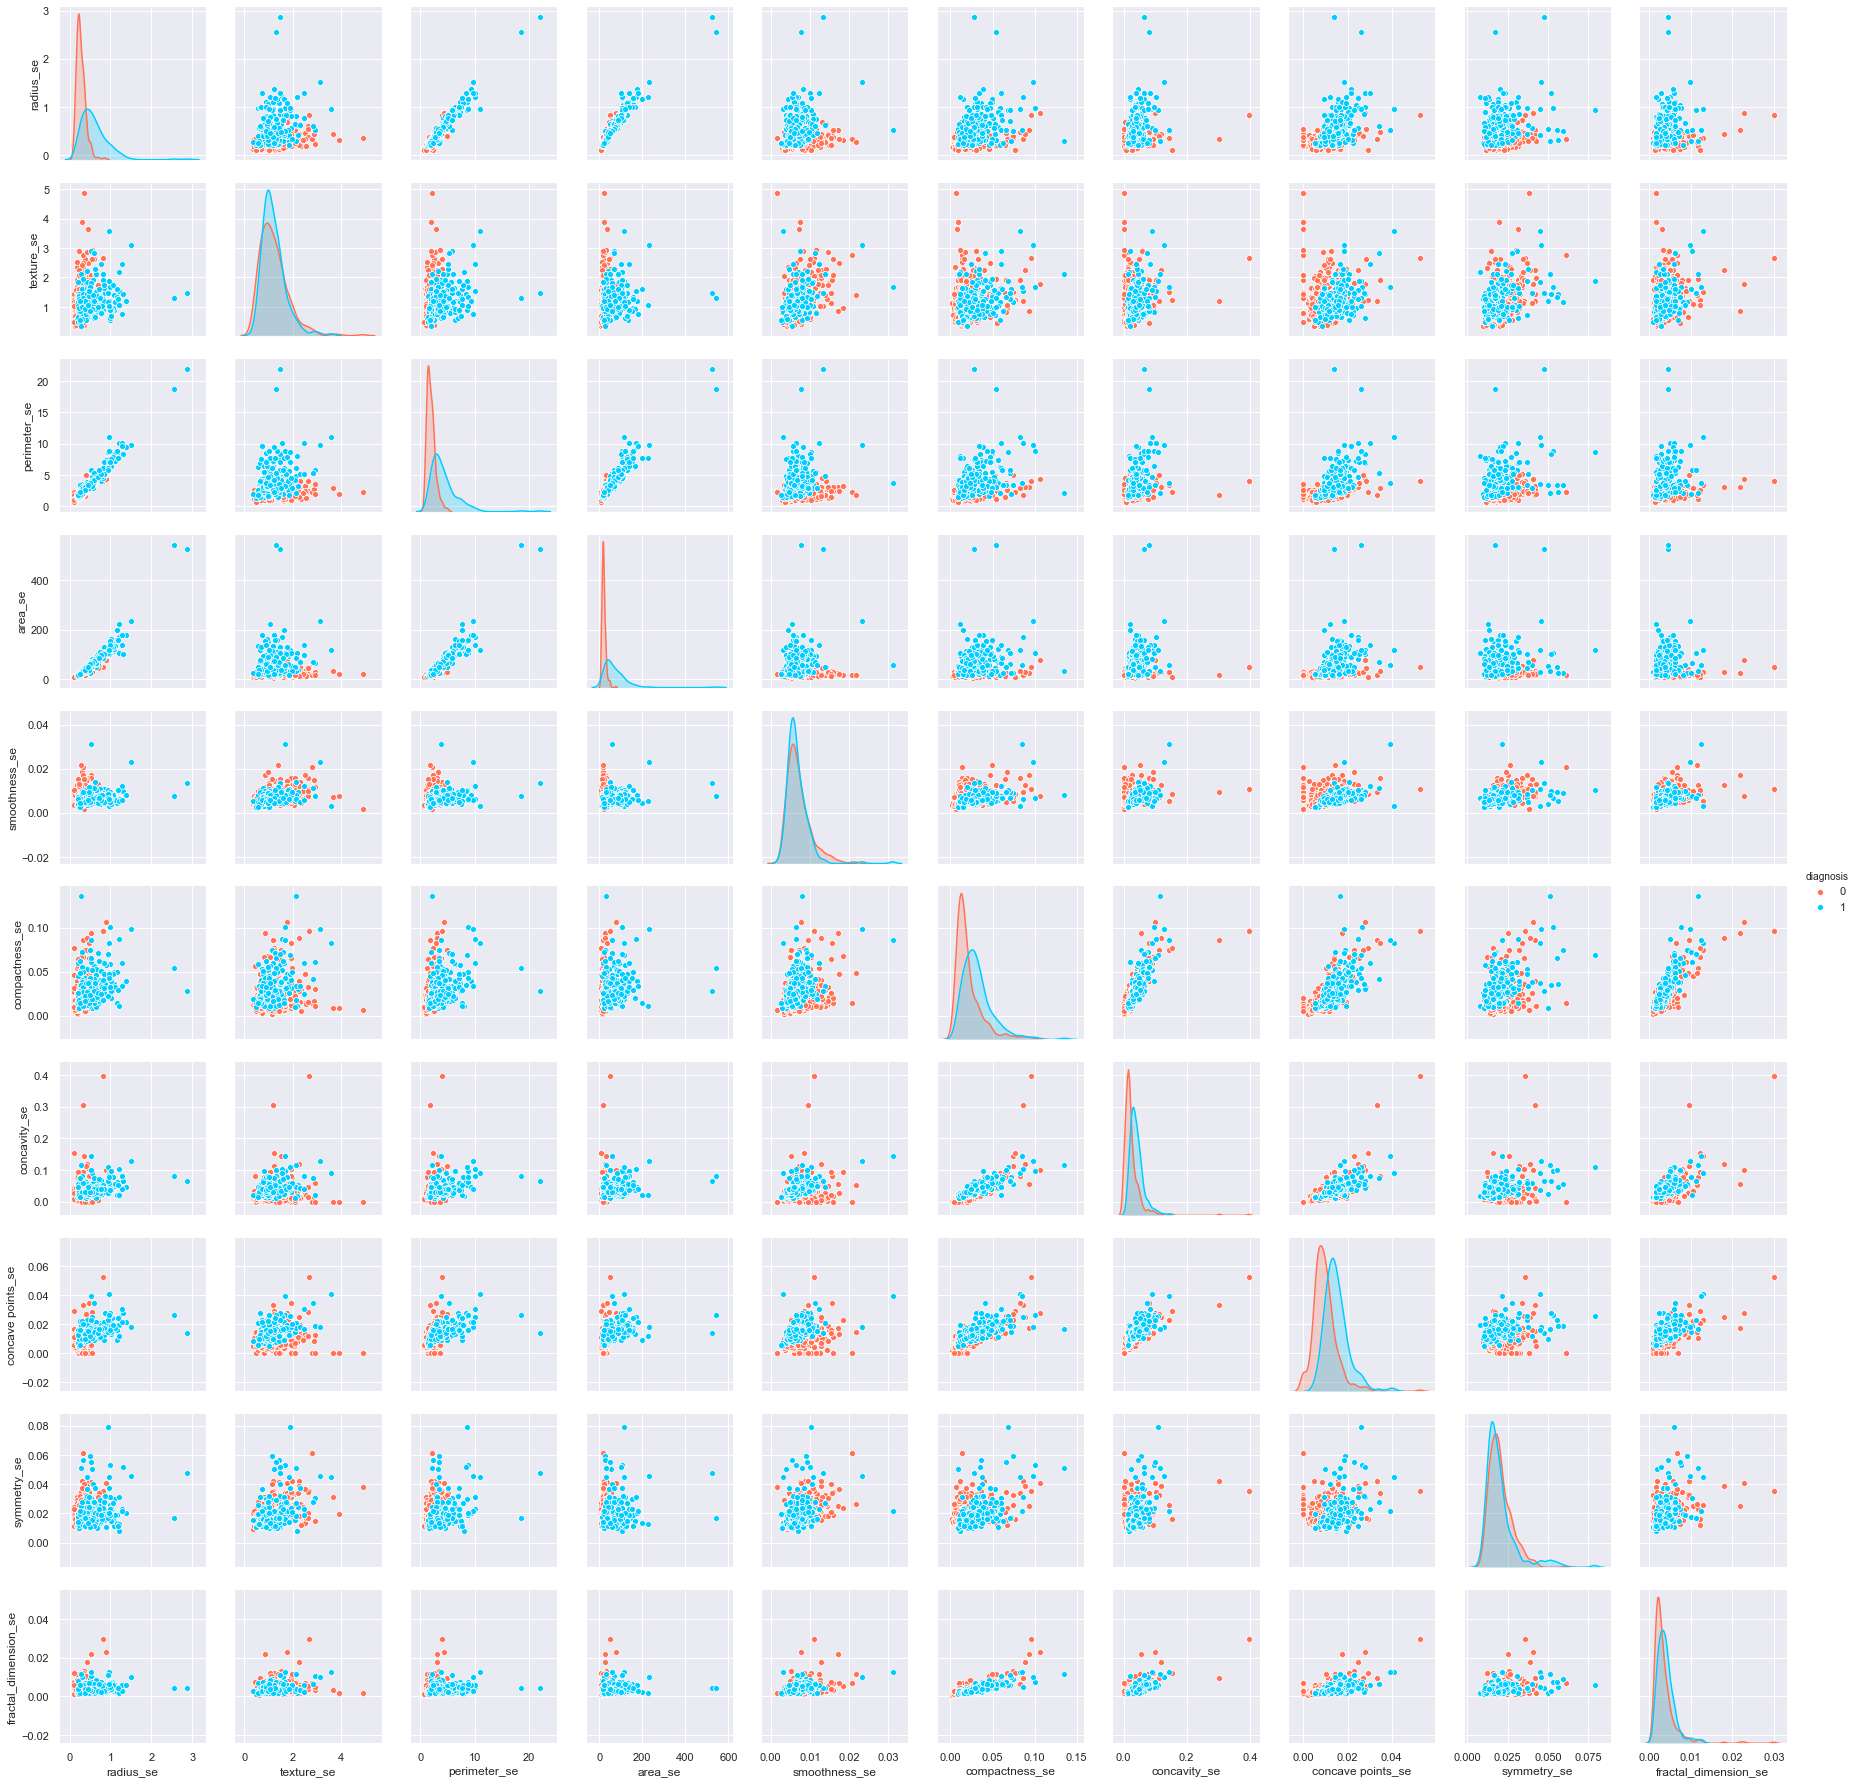

In [22]:
sns.pairplot(data=df, hue='diagnosis', vars=df.iloc[:, 11:21].columns, 
             palette=['#ff7256', '#00ccff'])

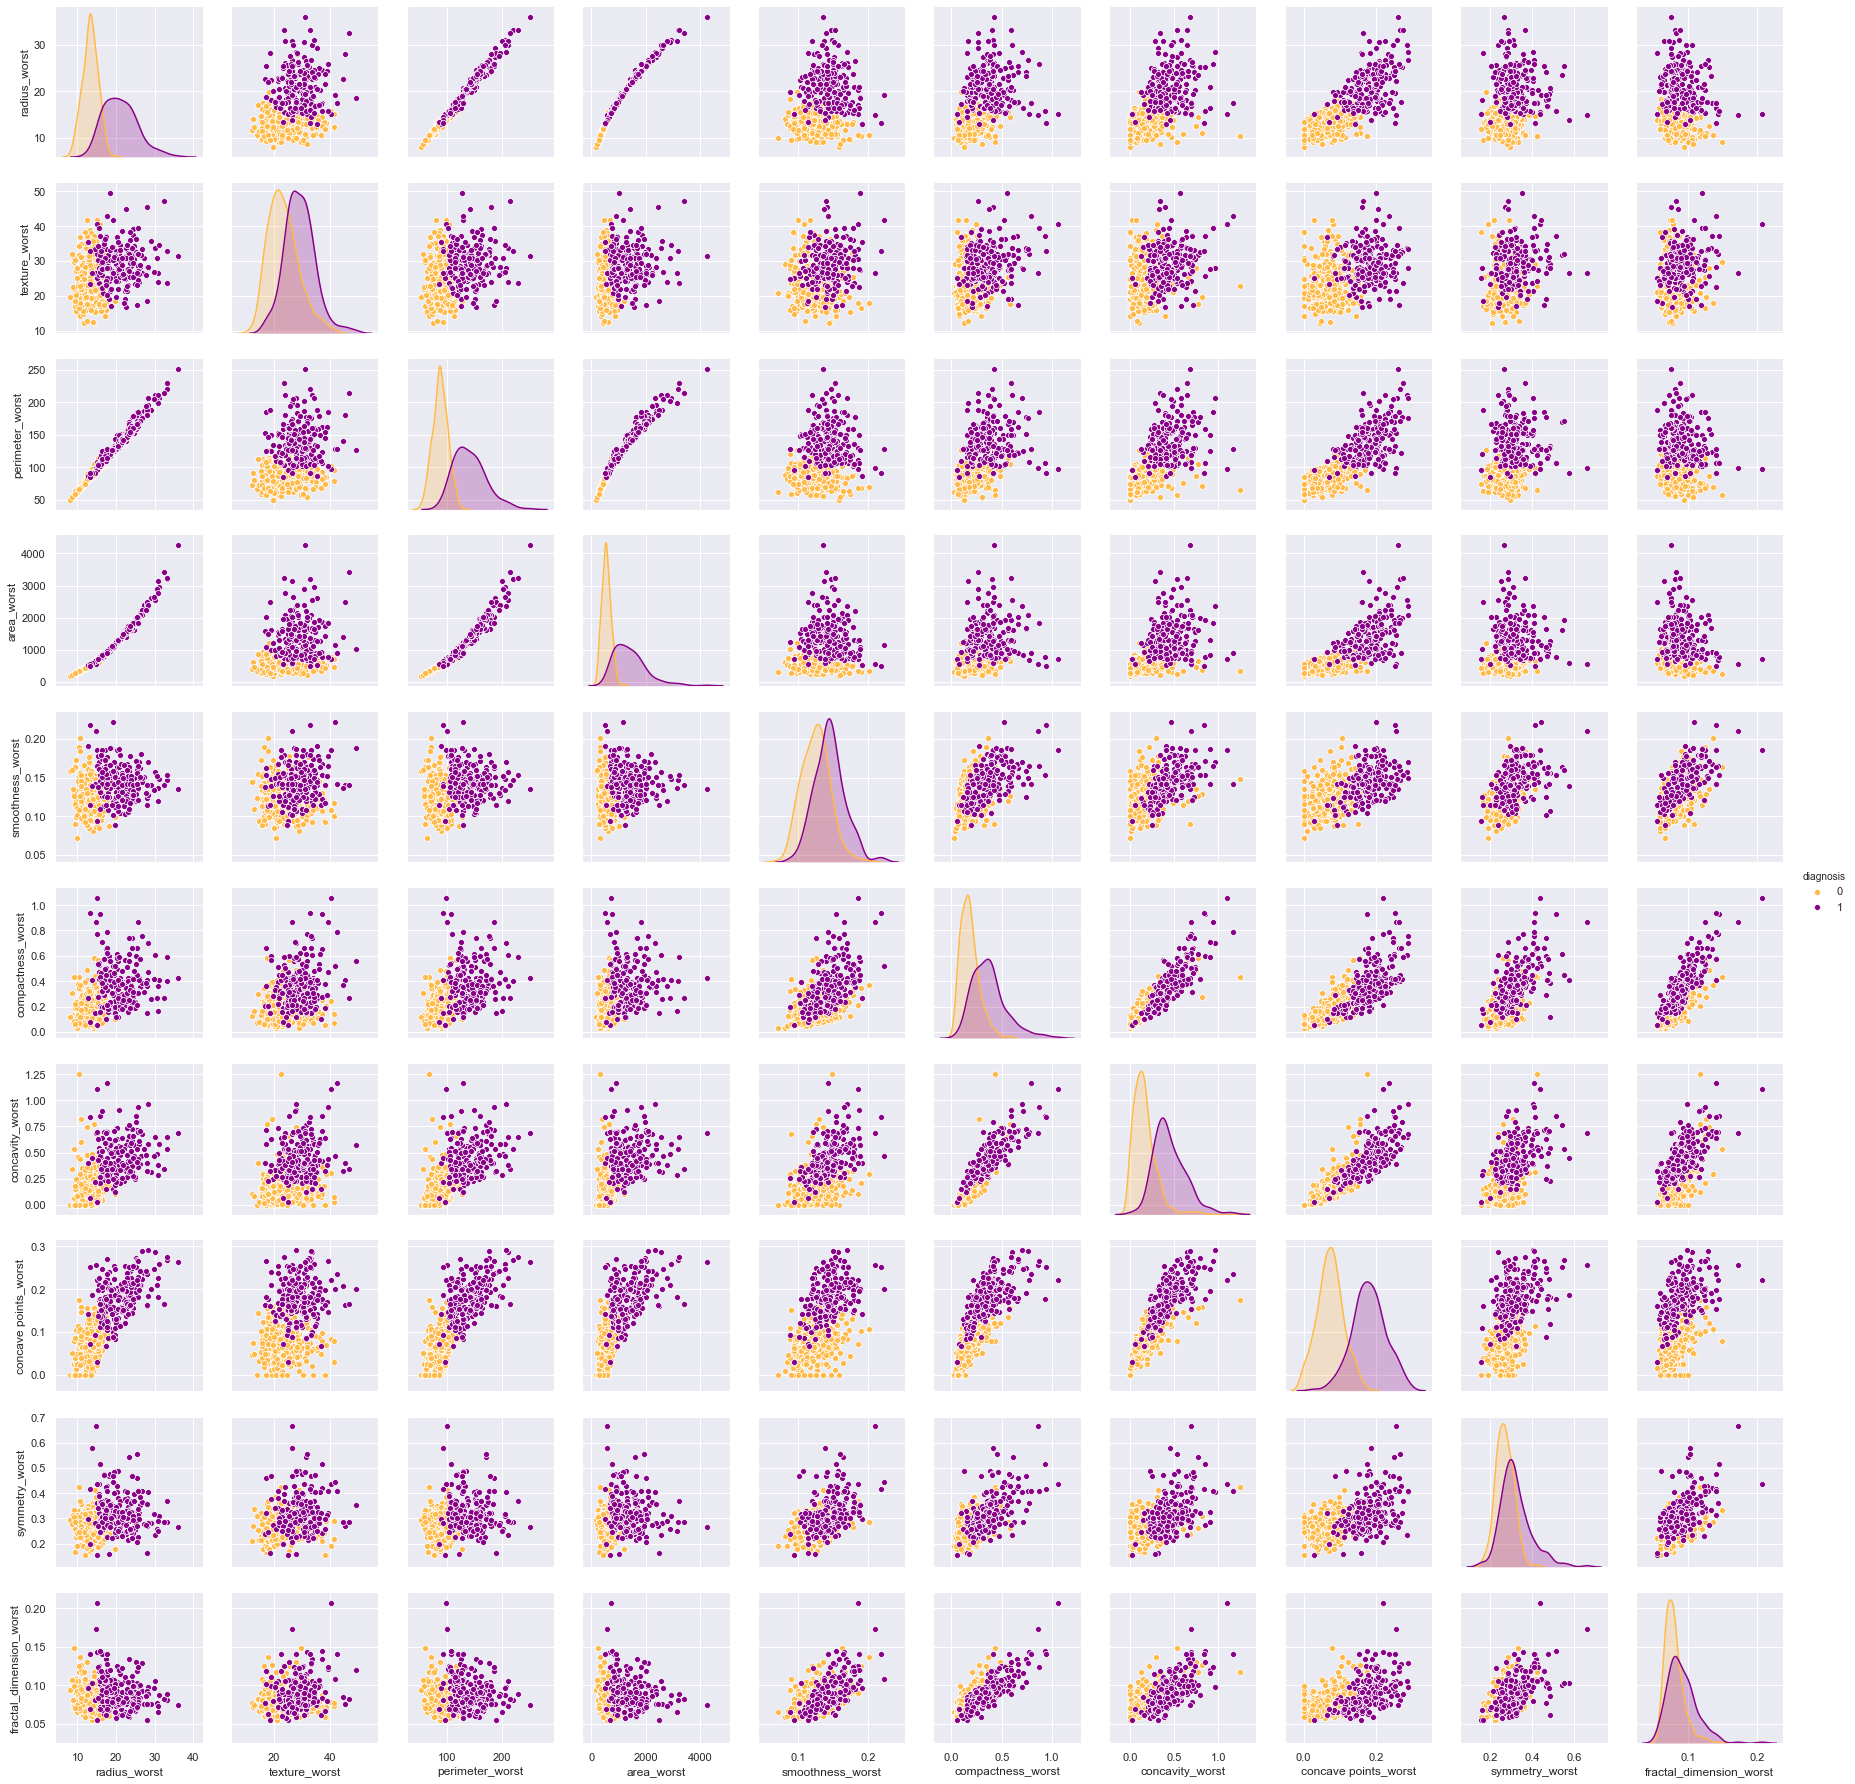

In [23]:
sns.pairplot(data=df, hue='diagnosis', vars=df.iloc[:, 21:].columns,
            palette=['#ffb947', '#880088'])

### Outlier detection and treatment
- Box plots and KDE plots are used to manually find the outliers for some selected features.
- Statistical method for outlier detection is used. Data that is further than three standard deviations from the mean (both upper and lower).

In [24]:
def outDetection_impute(df, column_name):
    data = df.copy()
    data.reset_index(drop=True, inplace=True)
    elements = data[column_name]
    impute_value = np.median(elements.dropna())
    mean = elements.mean()  #mean of data
    sd = elements.std()   #standard deviation of data
    upper_outlier = mean + 3 * sd
    lower_outlier = mean - 3 * sd
    list_l = [i for i, y in enumerate(elements.values) if (y < lower_outlier)]
    list_m = [i for i, x in enumerate(elements.values) if (x > upper_outlier)]
    data.loc[list_l + list_m, column_name] = impute_value
    return data

Box plots for checking the outliers

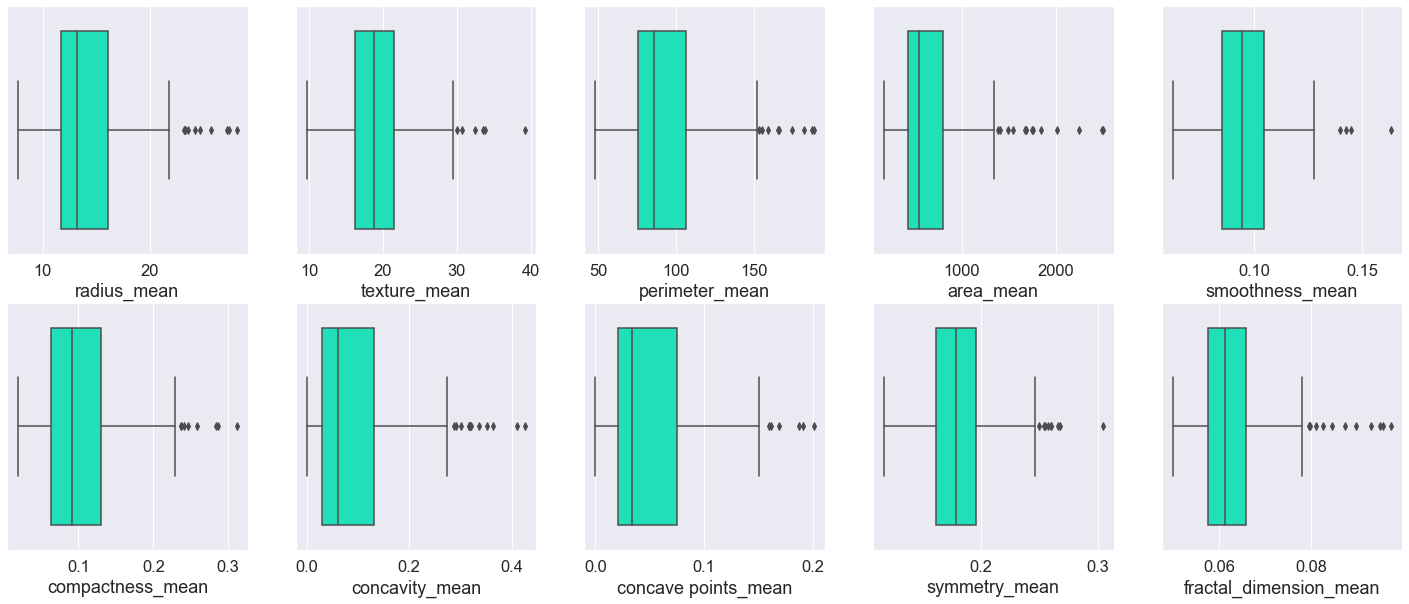

In [25]:
plot_box(X_train.iloc[:, :10], '#00ffcc')

KDE plot for checking the outliers and distribution

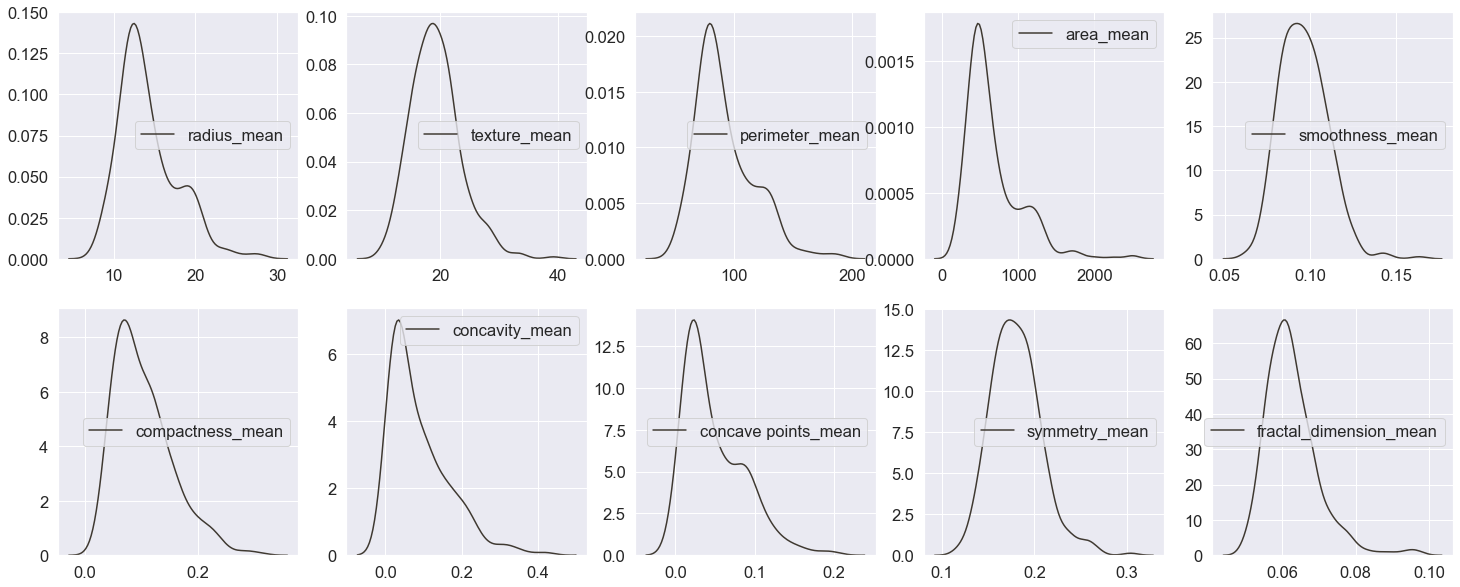

In [26]:
plot_kde(X_train.iloc[:, :10].dropna(), '#3f3931')

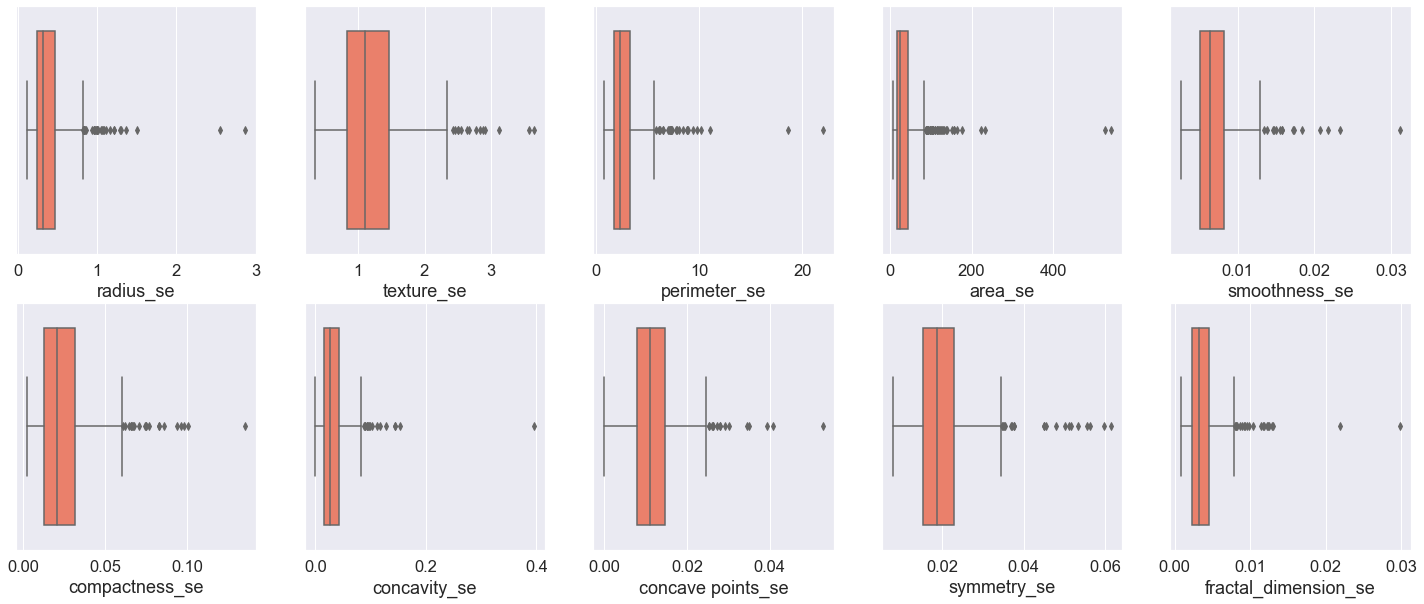

In [27]:
plot_box(X_train.iloc[:, 10:20], '#ff7256')

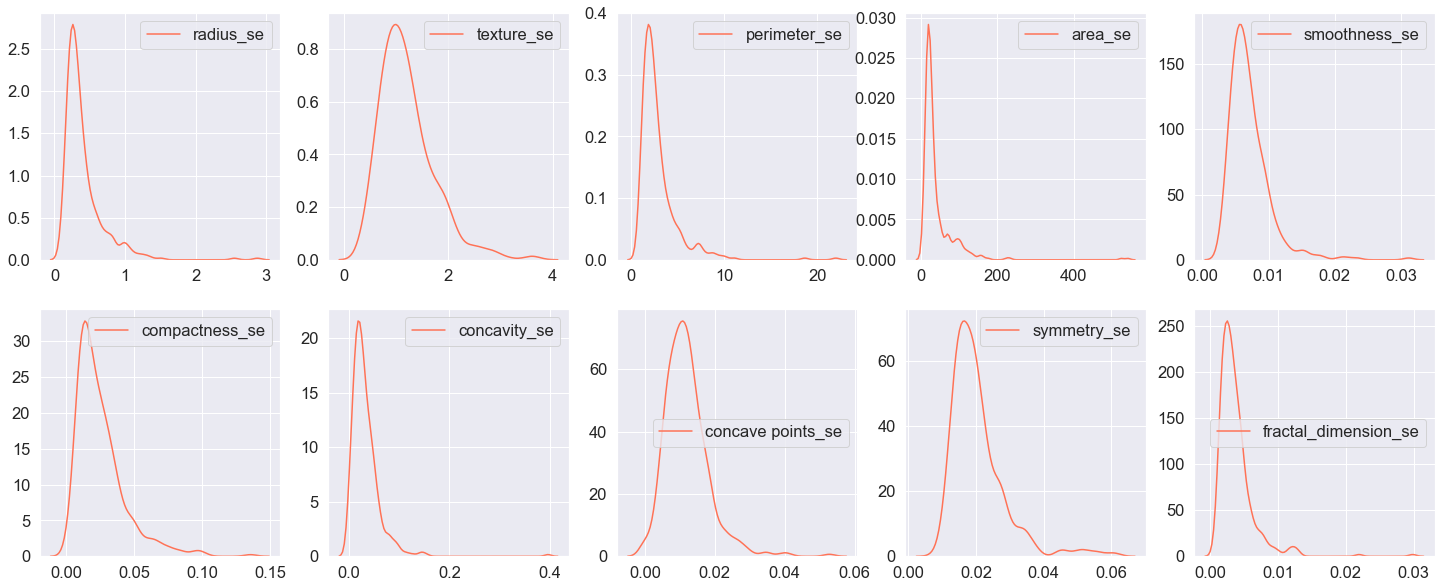

In [28]:
plot_kde(X_train.iloc[:, 10:20].dropna(), '#ff7256')

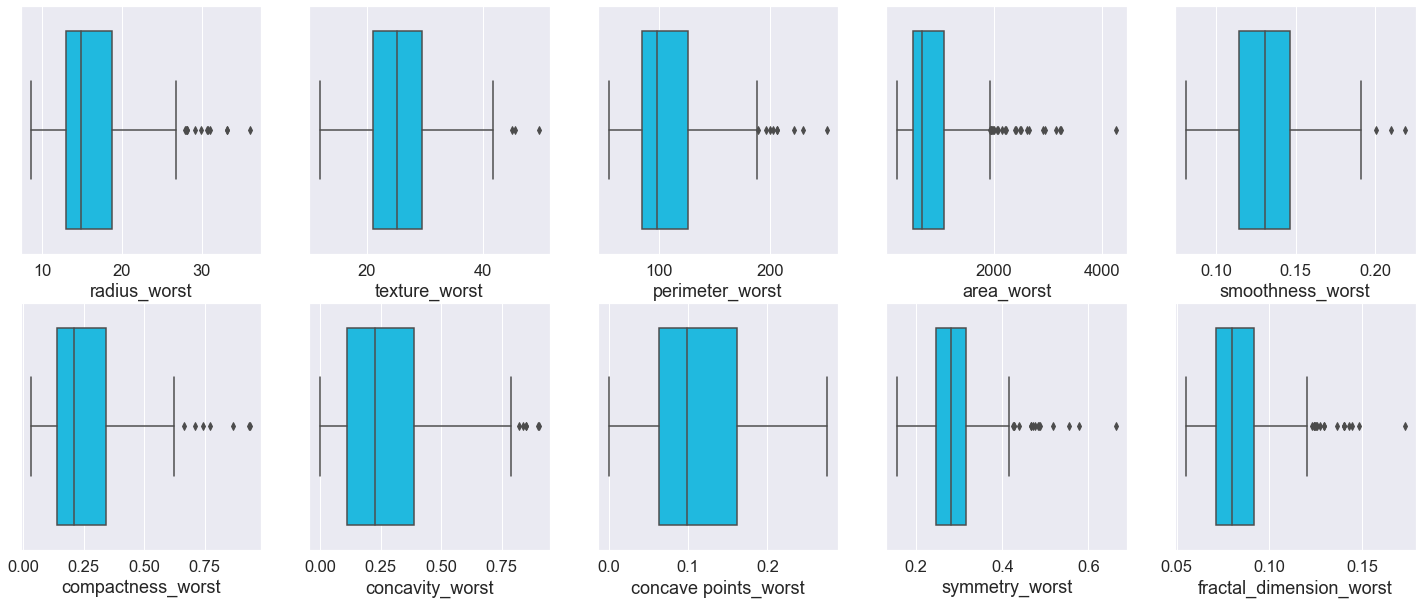

In [29]:
plot_box(X_train.iloc[:, 20:], '#00ccff')

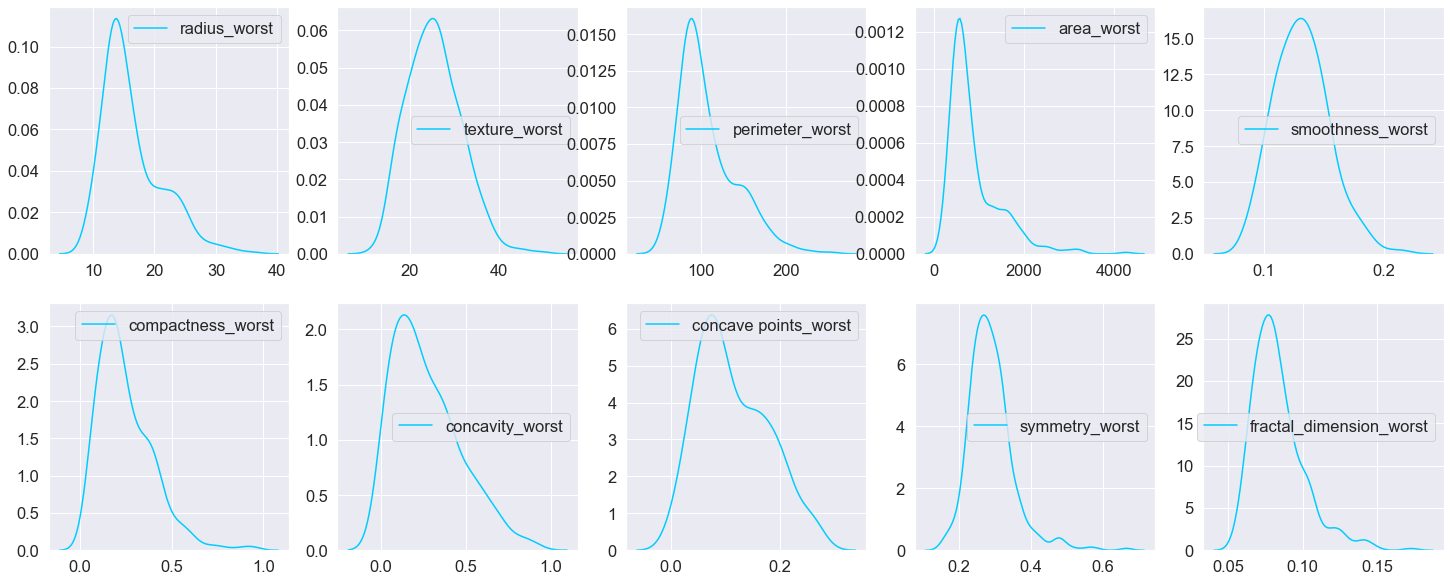

In [30]:
plot_kde(X_train.iloc[:, 20:], '#00ccff')

- Checking for outlier using statistical method
- And rather than deleting the values of outliers, imputing them with median because median is independent of the outliers of the data.
- Another reason for imputing the outlier values with median because the data is not very much and deleting the rows leads to some information loss.

In [31]:
# analyzed features with outliers to be removes
features_with_outliers = ['radius_se', 'area_se', 'fractal_dimension_se', 'symmetry_se', 
                         'area_worst', 'symmetry_worst', 'fractal_dimension_worst']

Removing the outliers from training and testing set separately

In [32]:
trimmed_data_train = outDetection_impute(X_train, features_with_outliers[0])
trimmed_data_train = outDetection_impute(trimmed_data_train, features_with_outliers[1])
trimmed_data_train = outDetection_impute(trimmed_data_train, features_with_outliers[2])
trimmed_data_train = outDetection_impute(trimmed_data_train, features_with_outliers[3])
trimmed_data_train = outDetection_impute(trimmed_data_train, features_with_outliers[4])
trimmed_data_train = outDetection_impute(trimmed_data_train, features_with_outliers[5])
trimmed_data_train = outDetection_impute(trimmed_data_train, features_with_outliers[6])

In [33]:
trimmed_data_test = outDetection_impute(X_test, features_with_outliers[0])
trimmed_data_test = outDetection_impute(trimmed_data_test, features_with_outliers[1])
trimmed_data_test = outDetection_impute(trimmed_data_test, features_with_outliers[2])
trimmed_data_test = outDetection_impute(trimmed_data_test, features_with_outliers[3])
trimmed_data_test = outDetection_impute(trimmed_data_test, features_with_outliers[4])
trimmed_data_test = outDetection_impute(trimmed_data_test, features_with_outliers[5])
trimmed_data_test = outDetection_impute(trimmed_data_test, features_with_outliers[6])

Imputing the null values with median

In [34]:
trimmed_data_train.fillna(trimmed_data_train.median().to_dict(), inplace=True)
trimmed_data_test.fillna(trimmed_data_test.median().to_dict(), inplace=True)

###### - Box plots and KDE plots to check the data after removing the outliers

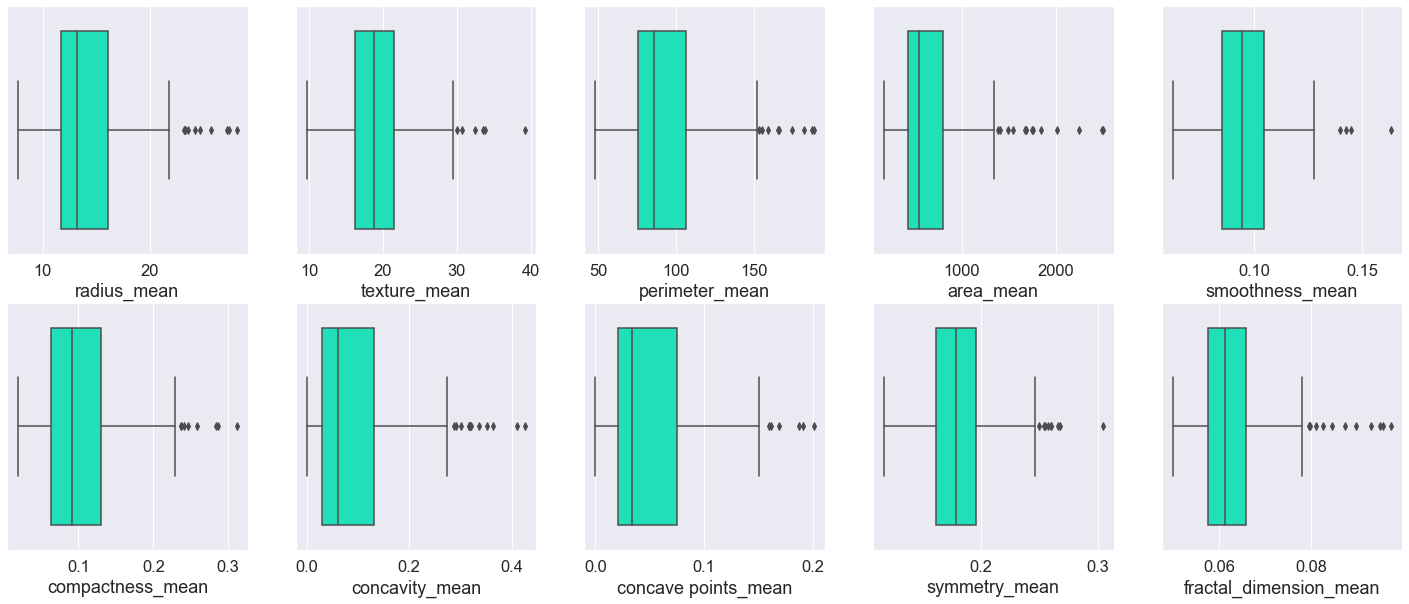

In [35]:
plot_box(trimmed_data_train.iloc[:, :10], '#00ffcc')

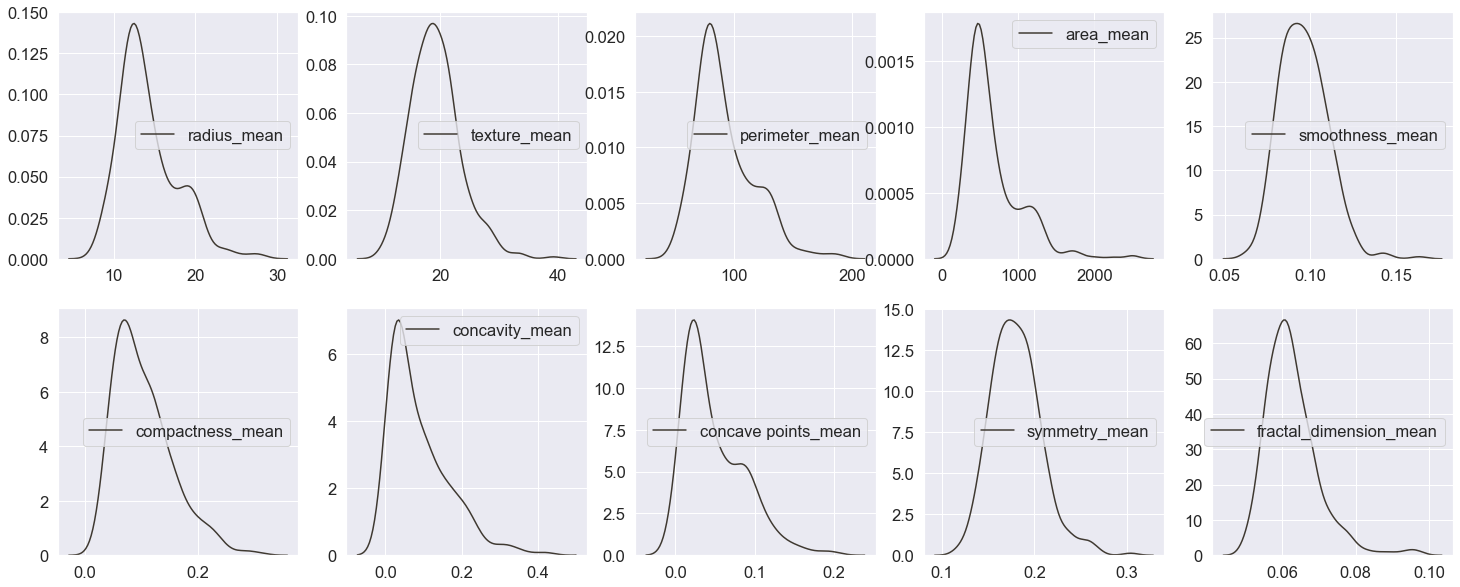

In [36]:
plot_kde(trimmed_data_train.iloc[:, :10], '#3f3931')

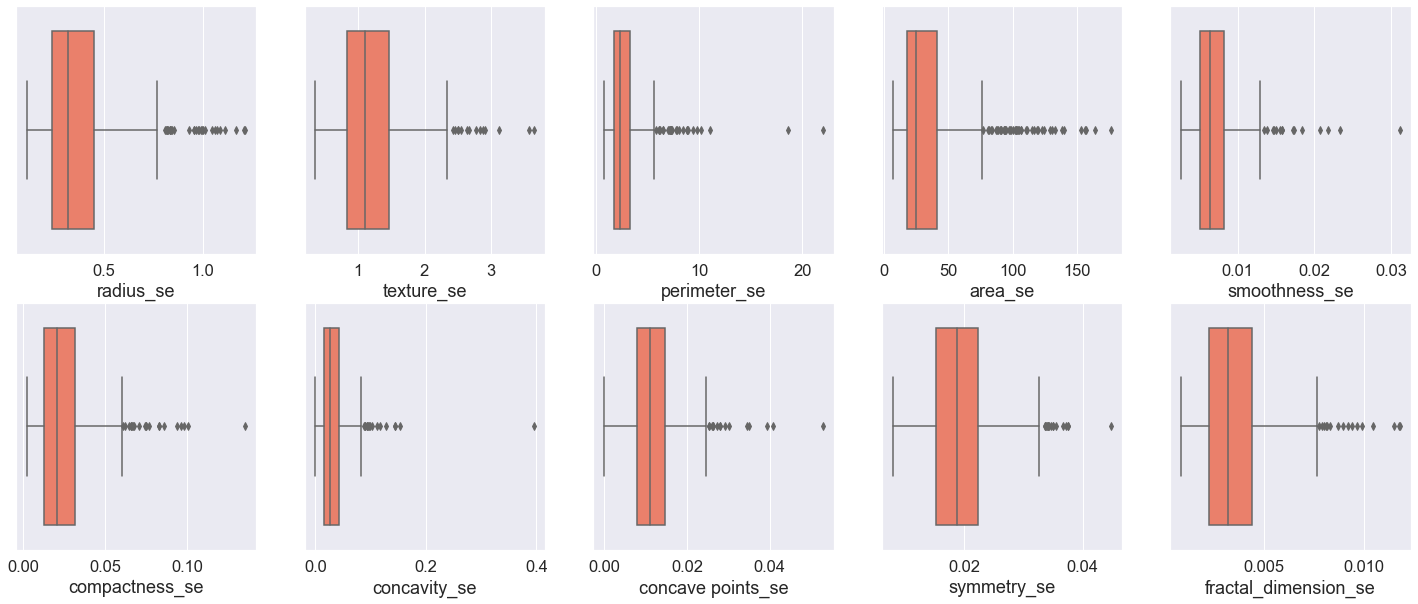

In [37]:
plot_box(trimmed_data_train.iloc[:, 10:20], '#ff7256')

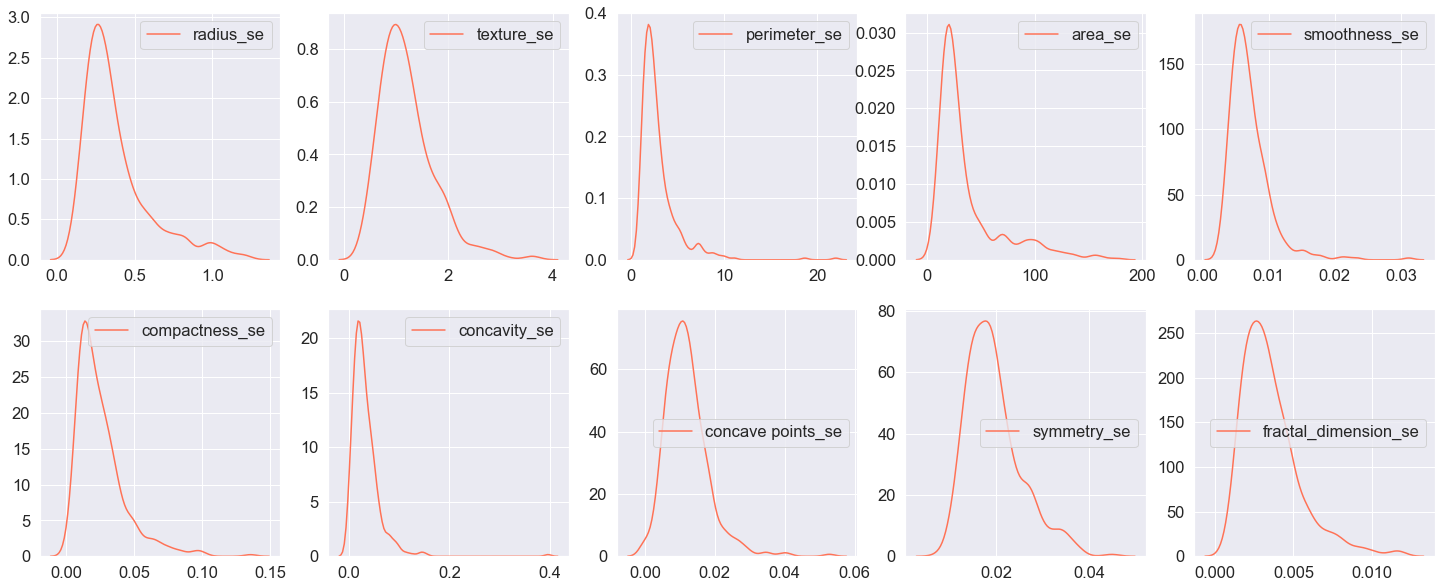

In [38]:
plot_kde(trimmed_data_train.iloc[:, 10:20], '#ff7256')

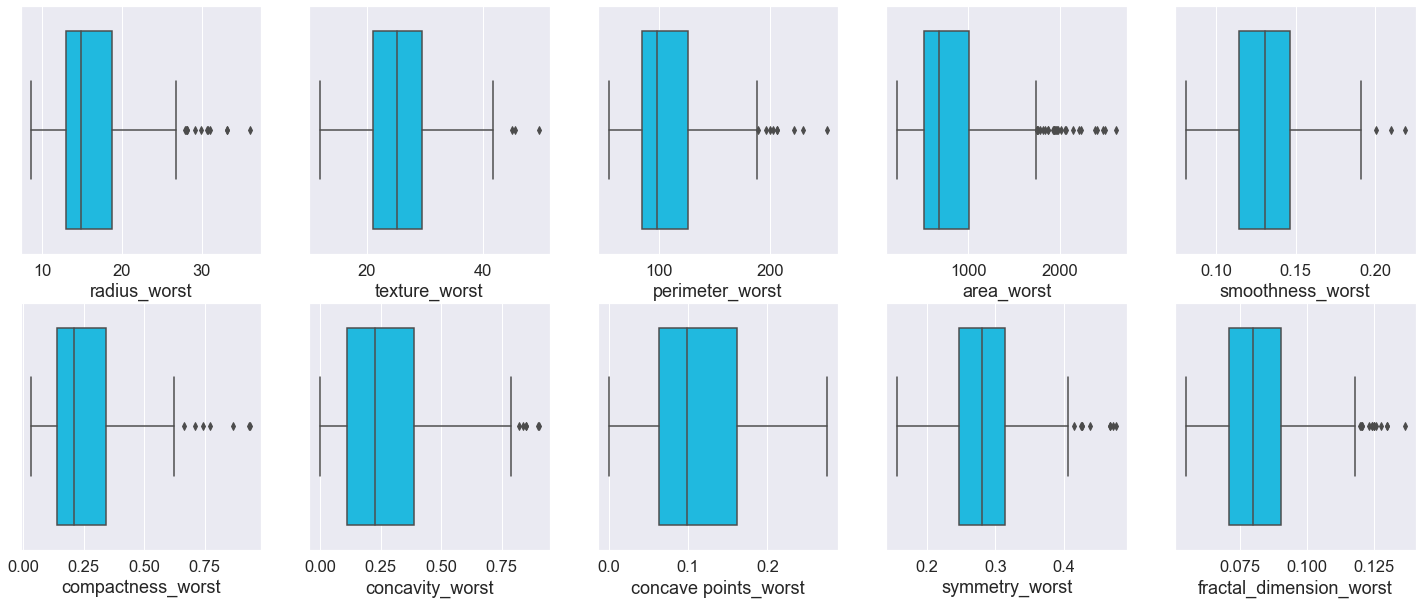

In [39]:
plot_box(trimmed_data_train.iloc[:, 20:], '#00ccff')

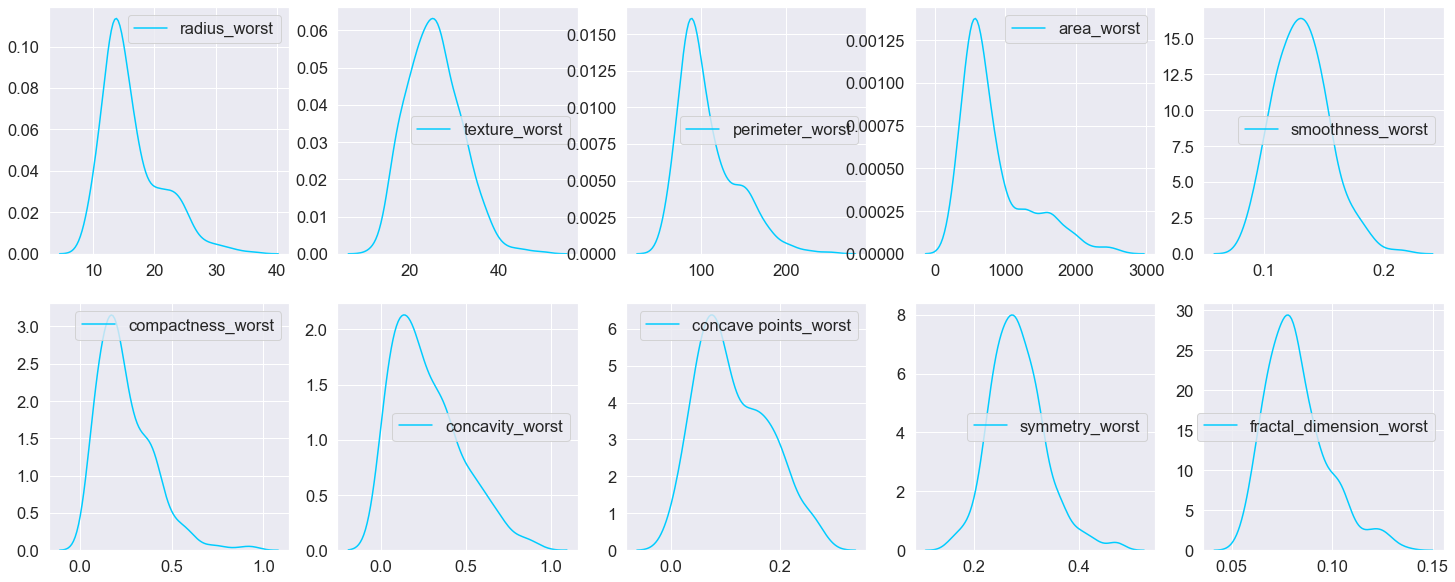

In [40]:
plot_kde(trimmed_data_train.iloc[:, 20:], '#00ccff')

###### Dropping the correlated columns

In [41]:
cols_to_drop = ['perimeter_mean', 'area_mean', 'perimeter_worst', 'area_worst', 
               'perimeter_se', 'area_se']

trimmed_data_train.drop(cols_to_drop, axis=1, inplace=True)
trimmed_data_test.drop(cols_to_drop, axis=1, inplace=True)

### Standardize the Data
- Standardising the data to Mean 0 and std 1

In [42]:
scaler = StandardScaler()
scaler.fit(trimmed_data_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

The mean and standard deviation of training data will be calculated and then applied to both test and train data set.

In [43]:
X_train_ = scaler.transform(trimmed_data_train)
X_test_ = scaler.transform(trimmed_data_test)

### PCA (Principal Component Analysis) - Dimensionality Reduction

- PCA is used to reduce dimensions of data and to speed up the machine learning algorithms
- As we have more than 3 feature, we can reduce the features to our desired number. Thus, dimensionality reduction is possible.

First applying PCA with components are the number of features

In [44]:
pca_breast = PCA()
principalComponents_breast = pca_breast.fit_transform(X_train_)

#### - Eigen vectors represents the direction towards the larger spread of data. 
#### - Eigen value represents the variance of that direction.

> We choose the components on the basis of variance. Top components contains most of the information of the data and we can choose them accordingly

###### Eigen Vector

In [72]:
print(pca_breast.components_)

[[ 1.70511409e-01  1.12473268e-01  2.01625135e-01  2.99765061e-01
   2.93385047e-01  2.74216767e-01  2.03805614e-01  1.52076776e-01
   1.68722500e-01  5.54773322e-02  6.29762778e-02  2.32262223e-01
   2.10267217e-01  2.25167078e-01  3.21118764e-02  1.80220121e-01
   1.85978855e-01  1.22658807e-01  1.89975976e-01  2.71841319e-01
   2.84477085e-01  2.78830419e-01  1.59288879e-01  2.00703610e-01]
 [-3.82835796e-01 -1.48168579e-01  1.29496592e-01  3.98471907e-02
  -7.83532575e-02 -1.88778336e-01  1.15141350e-01  3.89186960e-01
  -1.90053859e-01  1.50794795e-01  3.03503683e-01  1.98702670e-01
   1.53707739e-01  9.01135929e-02  2.23658249e-01  2.83694432e-01
  -3.83218648e-01 -1.62269820e-01  8.33061886e-02 -1.41785144e-03
  -6.98126499e-02 -1.89180472e-01 -2.68629881e-02  1.80004619e-01]
 [ 9.35046732e-02  2.85534242e-01 -2.03942293e-01 -5.86557050e-02
   4.50984247e-02  2.20916741e-02 -5.72719235e-02 -1.29546563e-01
   2.48648159e-01  4.41148817e-01  2.03432824e-01  1.77464192e-01
   2.087

###### Eigen Values

In [45]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [4.14980344e-01 1.58830860e-01 1.04382988e-01 7.38302031e-02
 5.47830637e-02 4.86798240e-02 2.53280239e-02 2.04789932e-02
 1.84406034e-02 1.57819287e-02 1.38273224e-02 1.14928455e-02
 1.01270703e-02 7.81801895e-03 5.91481666e-03 4.64888722e-03
 3.26892500e-03 2.07276027e-03 1.56935322e-03 1.14142051e-03
 1.03344290e-03 7.04365031e-04 5.88287642e-04 2.75652395e-04]


Checking the explained variance of each PCA component

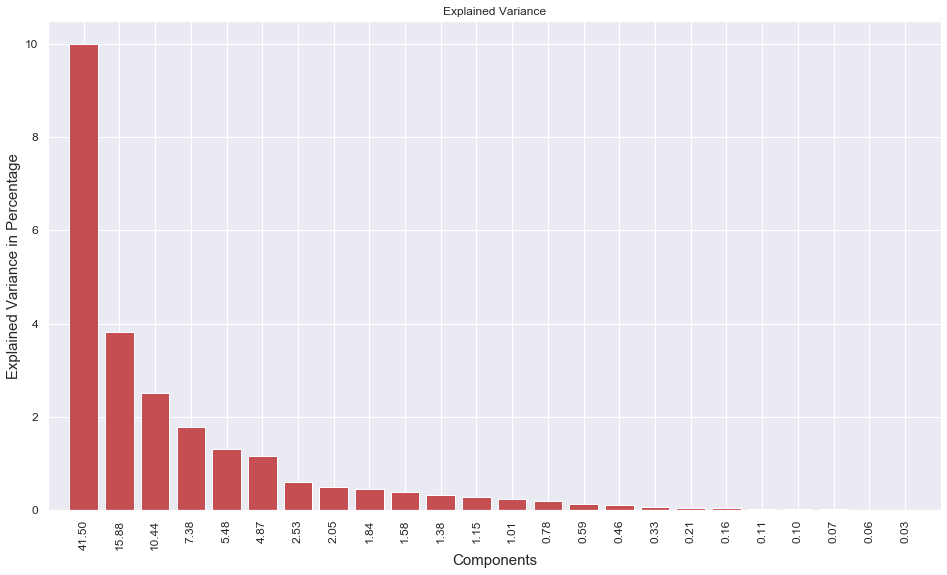

In [46]:
percent_explained = []
for i in pca_breast.explained_variance_ratio_:
    percent_explained.append("{:.2f}".format(i * 100))

plt.figure(figsize=(16, 9))
sns.set(style="darkgrid")
plt.title("Explained Variance")
plot = plt.bar(range(X_train_.shape[1]), pca_breast.explained_variance_,
       color="r", align="center")
plt.xticks(range(X_train_.shape[1]), percent_explained, rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([-1, X_train_.shape[1]])
plt.xlabel('Components', fontsize=15)
plt.ylabel('Explained Variance in Percentage', fontsize=15)
#plt.savefig('images/plots/imp_features_decision_tree.SVG', bbox='tight')
plt.show()

###### Plotting first two components

In [47]:
plot_pca = pd.DataFrame({"Target": y_train, 
                         "Pricipal Component 1": principalComponents_breast[:, 0],
                         "Pricipal Component 2": principalComponents_breast[:, 1]})

print(plot_pca.head())

     Target  Pricipal Component 1  Pricipal Component 2
172       1              3.221016              0.247012
407       0             -0.890434              1.238890
56        1              2.851636             -2.391346
497       0             -2.273814             -0.722632
301       0             -0.913996              0.998602


We can see that below scatter plot separates the two classes very precisely

Text(0, 0.5, 'Principal Component 2')

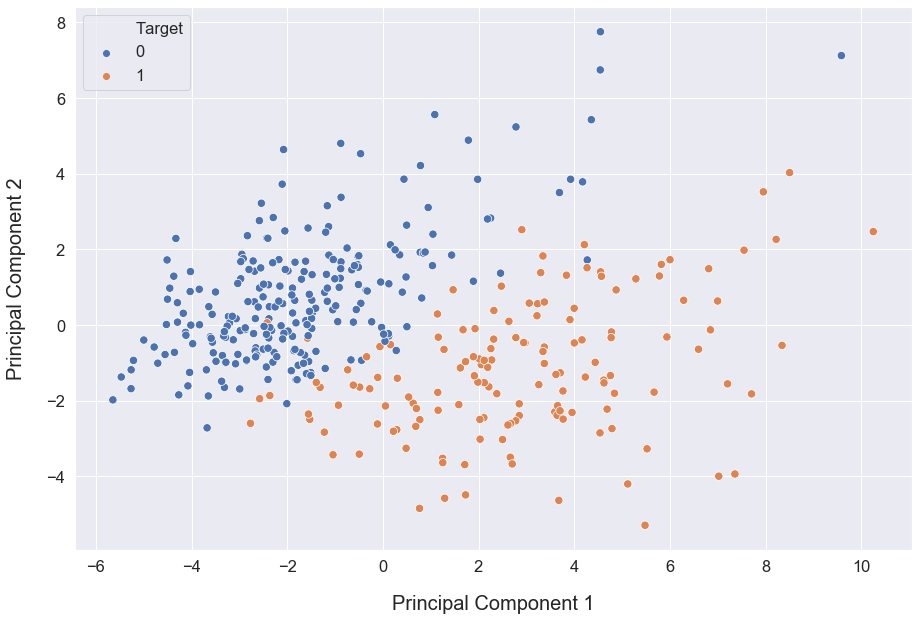

In [48]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Pricipal Component 1',
               y="Pricipal Component 2",
               data=plot_pca,
               hue='Target',
               s=70)
plt.xlabel("Principal Component 1", fontsize=20, labelpad=20)
plt.ylabel("Principal Component 2", fontsize=20, labelpad=20)

###### Now, taking the components as features with maximum information (variance) for the machine learning model.

We can see that the explained variance is increasing very slowly after 16th component

In [49]:
cum_sum_var = np.cumsum(np.round(pca_breast.explained_variance_ratio_, decimals=3)*100)

print(cum_sum_var)

[ 41.5  57.4  67.8  75.2  80.7  85.6  88.1  90.1  91.9  93.5  94.9  96.
  97.   97.8  98.4  98.9  99.2  99.4  99.6  99.7  99.8  99.9 100.  100. ]


Cumulative Sum represents that 16 features explains around 99% variance

Text(0, 0.5, 'Explained Variance')

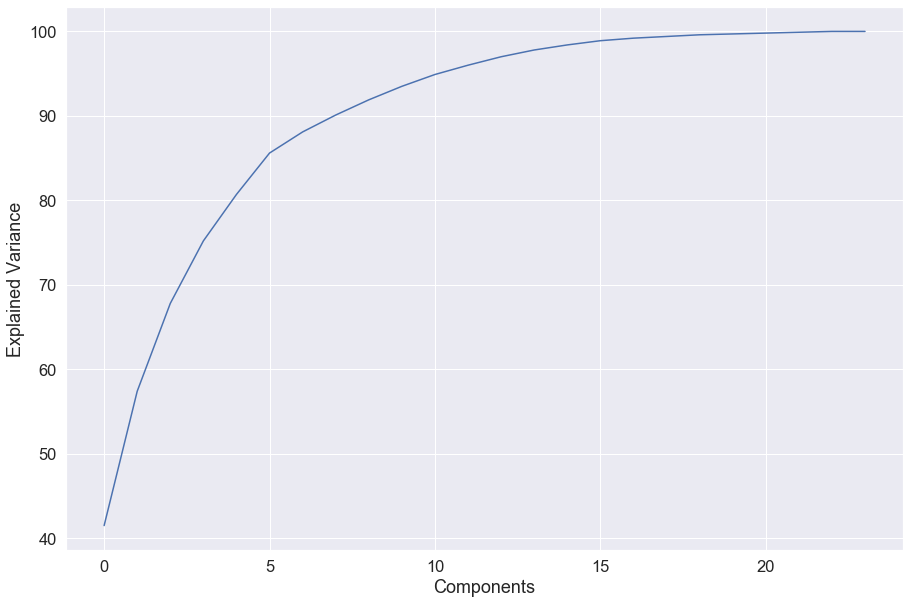

In [50]:
plt.figure(figsize=(15, 10))
plt.plot(cum_sum_var)
plt.xlabel("Components")
plt.ylabel("Explained Variance")

Selecting 16 components and applying PCA again

In [51]:
pca_model = PCA(n_components=16)

pca_model.fit(X_train_)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Transforming the data

In [52]:
X_train_ = pca_model.transform(X_train_)
X_test_ = pca_model.transform(X_test_)

In [53]:
print("Shape of training data: ", X_train_.shape, "\n Shape of testing data: ", X_test_.shape)

Shape of training data:  (381, 16) 
 Shape of testing data:  (188, 16)


### Training the model using Logistic Regression
- As the training data is less, we can select the logistic regression as our classifier as it is less complex algorithm.
- It is less prone to overfitting as compared to other algorithms.

In [54]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train_, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Checking the predictions on unseen data (test data)

In [55]:
logisticRegr.predict(X_test_)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [56]:
print("Accuracy of the model: ", np.round(logisticRegr.score(X_test_, y_test) * 100, 5), "%")

Accuracy of the model:  97.34043 %


Classification report to check the f1-score and other essential metrics to check the performance.
- We cannot rely on accuracy alone

In [57]:
print(classification_report(y_test, logisticRegr.predict(X_test_)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       121
           1       0.96      0.97      0.96        67

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



###### Confusion Matrix

In [58]:
print(confusion_matrix(logisticRegr.predict(X_test_), y_test))

[[118   2]
 [  3  65]]


- There are in total 5 wrong predictions.
- There are 2 false positive predictions i.e., they are wrongly predicted to be true and 3 false negative i.e., they are wrongly predicted to be false.
- True positive and true negative tells about the model, that it is working fine.

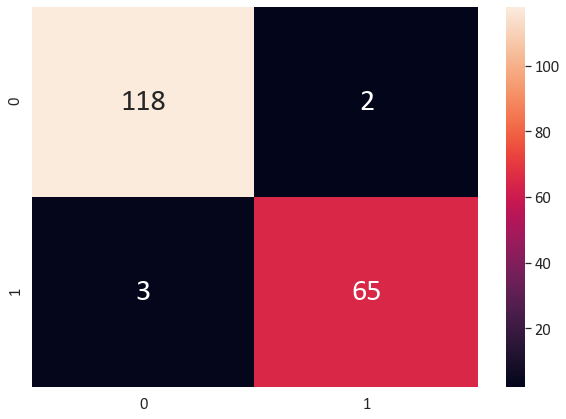

In [59]:
plot_confusion_matrix(confusion_matrix(logisticRegr.predict(X_test_), y_test))

### K-fold cross validation

Splitting the data into 5 sets and test the model on each set.

In [60]:
kf = KFold(n_splits=5) # Define the split - into 2 folds 

> Function takes X and y data and apply all necessary steps and train the model on each set of data and returns the list containing the scores and confusion matrices.

In [61]:
def cross_validation(X, y, splits):
    X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)
    acc_scores = []
    confusion_matrices = []
    kf = KFold(n_splits=splits)
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], \
        y[train_index], y[test_index]

        cols_to_drop = ['perimeter_mean', 'area_mean', 'perimeter_worst', 'area_worst']
        X_train.drop(cols_to_drop, axis=1, inplace=True)
        X_test.drop(cols_to_drop, axis=1, inplace=True)

        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        pca_model = PCA(n_components=18)
        pca_model.fit(X_train)

        X_train_ = pca_model.transform(X_train)
        X_test_ = pca_model.transform(X_test)

        logisticRegr = LogisticRegression(solver = 'lbfgs')
        logisticRegr.fit(X_train_, y_train)
        acc_scores.append(logisticRegr.score(X_test_, y_test))
        confusion_matrices.append(confusion_matrix(y_test, logisticRegr.predict(X_test_)))
            
    return acc_scores, confusion_matrices

In [62]:
acc_scores, conf_matrices = cross_validation(X, y, 5)

C:\Users\rahul\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\rahul\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\rahul\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\rahul\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A 

In [63]:
print("Accuracy scores of each model trained on each set of data: \n", acc_scores)

Accuracy scores of each model trained on each set of data: 
 [0.9736842105263158, 0.9473684210526315, 0.9824561403508771, 0.9912280701754386, 0.9911504424778761]


Confusion matrices of each model

In [64]:
for i in range(5):
    print(conf_matrices[i], "\n")

[[45  1]
 [ 2 66]] 

[[64  1]
 [ 5 44]] 

[[74  0]
 [ 2 38]] 

[[84  1]
 [ 0 29]] 

[[86  1]
 [ 0 26]] 



In [65]:
print("Mean accuracy: ", np.mean(acc_scores))

Mean accuracy:  0.9771774569166277


In [66]:
print("Mean accuracy of K-fold cross vaildation: ", 
      np.round(np.mean(acc_scores) * 100, 5), "%\n",
      "Accuracy of original classifier trained on all data: ",
      np.round(logisticRegr.score(X_test_, y_test) * 100, 5), "%")

Mean accuracy of K-fold cross vaildation:  97.71775 %
 Accuracy of original classifier trained on all data:  97.34043 %


It tells that, our model is working fine as we have validated with cross validation

### ROC and AUC

In [67]:
def plot_roc_curve(y_true, y_proba):
    sns.set(style='darkgrid', font_scale=2, font="calibri", 
            rc={'axes.facecolor':'#d8d8d8'})
    plt.figure(figsize=(14, 8))
    ax = sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--')
    ax.lines[0].set_linestyle("--")
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    sns.lineplot(x=fpr, y=tpr, label="Log. Regression (AUC: " + str(round(auc, 2)) + ")")
    plt.ylabel('True Positive Rate', labelpad=25)
    plt.xlabel('False Positive Rate', labelpad=25)
    plt.show()

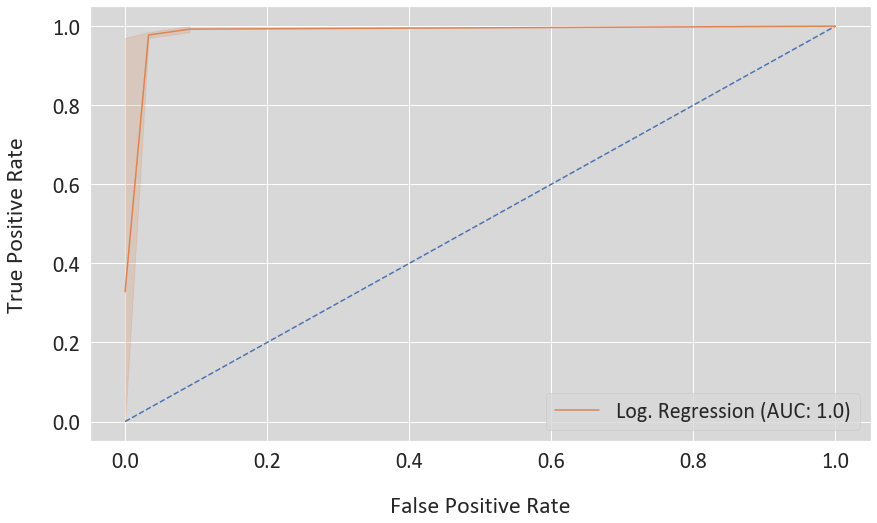

In [68]:
plot_roc_curve(y_test, logisticRegr.predict_proba(X_test_)[:, 1])

### Learning Curve

In [69]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), 
                                                        X, 
                                                        y,
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1)

Learning curve shows that model is trained without overfitting or underfitting.

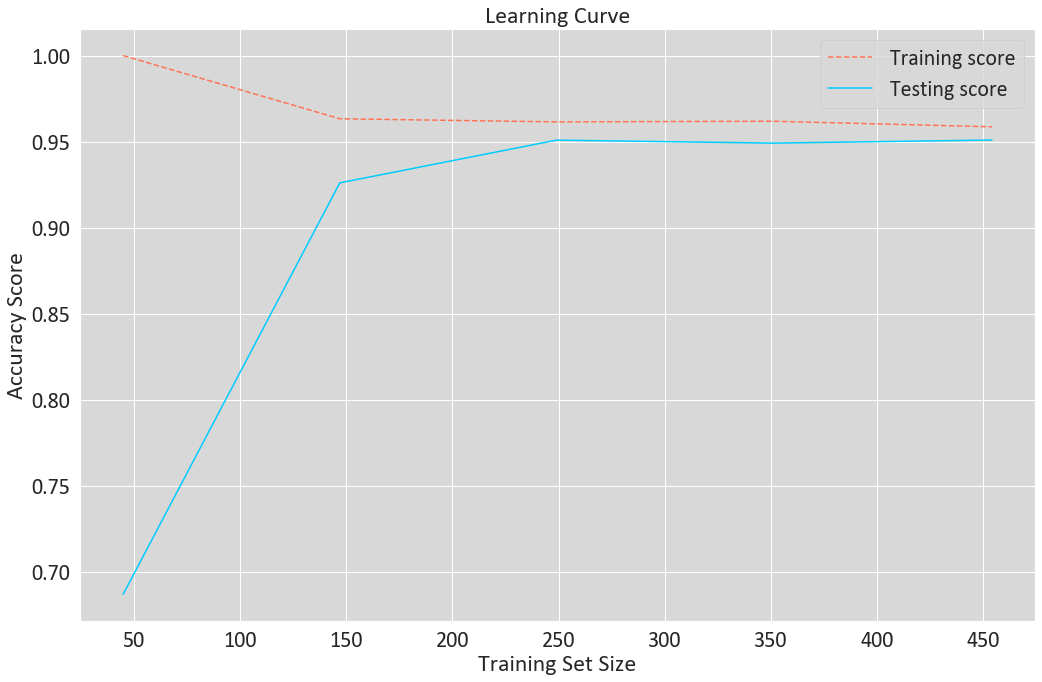

In [71]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(15, 10))

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#ff7256",  label="Training score")
plt.plot(train_sizes, test_mean, color="#00ccff", label="Testing score")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()